<a href="https://colab.research.google.com/github/Punyasyitha/AspectBasedSentimentAnalysis/blob/main/ABSA_FinalProject'25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scrapping Comments + How to fix coloumn 'time'

In [ ]:
pip install pandas

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import re

# ===============================
# KONFIGURASI
# ===============================
INPUT_FILE = "Scrap_Indihome_merged.csv"
OUTPUT_FILE = "drive/MyDrive/Laporan PA/PA LJ D4/Dataset/Indihome_fixed_time.csv"
TIME_COLUMN = "Time"  # ganti sesuai nama kolom waktu di CSV


# Waktu saat scraping (otomatis)
scraping_time = datetime.now()

# ===============================
# FUNGSI KONVERSI
# ===============================
def convert_relative_time(text, base_time):
    if pd.isna(text):
        return None

    text = text.lower().strip()

    nums = re.findall(r"\d+", text)
    if not nums:
        return None
    num = int(nums[0])

    if "menit" in text:
        return base_time - timedelta(minutes=num)

    if "jam" in text:
        return base_time - timedelta(hours=num)

    if "hari" in text:
        return base_time - timedelta(days=num)

    # 🔥 FIX UTAMA DI SINI
    if "minggu" in text or "ming" in text:
        return base_time - timedelta(weeks=num)

    if "bulan" in text:
        return base_time - timedelta(days=num * 30)

    if "tahun" in text:
        return base_time - timedelta(days=num * 365)

    return None

# ===============================
# PROSES CSV
# ===============================
dataset = pd.read_csv(INPUT_FILE)

dataset["waktu_asli_estimasi"] = dataset[TIME_COLUMN].apply(
    lambda x: convert_relative_time(x, scraping_time)
)

dataset["waktu_scraping"] = scraping_time

# ===============================
# SIMPAN HASIL
# ===============================
dataset.to_csv(OUTPUT_FILE, index=False)

print("✅ Konversi selesai!")
print(f"📁 File hasil: {OUTPUT_FILE}")
dataset = pd.read_csv(OUTPUT_FILE)
print(dataset.head())

# python convert_waktu_relative.py

FileNotFoundError: [Errno 2] No such file or directory: 'Scrap_Indihome_merged.csv'

## How to merge data of comments from each post of each provider's off account Instagram

In [ ]:
import pandas as pd

data_frames = []

for i in range(1, 8):  # karena hanya sampai (5)
    filename = f'drive/MyDrive/Laporan PA/PA LJ D4/Dataset/Scrap_Indihome ({i}).csv'
    dataset = pd.read_csv(filename)
    data_frames.append(dataset)

merged_dataset = pd.concat(data_frames, ignore_index=True)
merged_dataset.to_csv('Scrap_Indihome_merged.csv', index=False)

dataset = dataset.rename(columns={
    'Times': 'Time'
})

print("✅ Merge selesai")
print(dataset)

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/Laporan PA/PA LJ D4/Dataset/Scrap_Indihome (1).csv'

## Adding coloumns 'Provider' to each merge provider data

In [ ]:
import pandas as pd

dataset_axis = pd.read_csv('drive/MyDrive/Laporan PA/PA LJ D4/Dataset/Axis_fixed_time.csv')
dataset_axis['provider'] = 'Axis'
print(dataset_axis)

         Username     Time                                               Text  \
0         axis_id   3 hari  Akhir tahun, promo kembar bikin ambyar!!!Beli ...   
1     nekizaznayy   3 hari             Wow keren aku pake axiz sejak thn 2013   
2           t4fik   3 hari   Benerin sinyall min gak ada sinyal bet ini kartu   
3     15012000aan   2 hari  Min paket owsem udah berubah ya ngga kayak dul...   
4        xxnvha09   3 hari  Apa saya aja ya yang aplikasinya muter terus, ...   
..            ...      ...                                                ...   
280    angga_dd57  11 ming  Ini axis kenapa ya. Di isiin pulsa gak masuk² ...   
281  alfinjardika  11 ming  Tumben sinyalnya kumat lagi nih dari tadi mala...   
282      zanbokor  11 ming  Sedih banget gw pakai provider ini, luar biasa...   
283      tr.yntsr  11 ming                    min sinyal mu kenapaaa seehhhhh   
284  anisa_cahyaa  11 ming  Apakah jaringan Axis lagi terganggu, knp X ter...   

            waktu_asli_esti

In [ ]:
import pandas as pd

dataset_biznet = pd.read_csv('drive/MyDrive/Laporan PA/PA LJ D4/Dataset/Biznet_fixed_time.csv')
dataset_biznet['provider'] = 'Biznet'
print(dataset_biznet)

              Username      Time  \
0           biznethome  1 minggu   
1          budykersana  1 minggu   
2             syogifar  1 minggu   
3             cilcecil  1 minggu   
4       sandy_rahadian  1 minggu   
..                 ...       ...   
190            saanfdd   10 ming   
191             maailp   10 ming   
192             maailp   10 ming   
193  jeffry_fernando69   10 ming   
194         fianfelime   10 ming   

                                                  Text  \
0    WiFi kenceng di lantai 1, hilang pas naik ke l...   
1    Ga usah mansion mansion... Bisa lancar aja ud ...   
2    Internet di rumah saya mati dari kemarin, info...   
3    14 hari ga ada koneksi di Modernland 🔥👏 menyal...   
4          Internet mati dr smlm.sampe skrg msh blm bs   
..                                                 ...   
190  minn biznet di dipatiukur baru kmren maintenan...   
191                                             Cek DM   
192  Punten minnn,mau nanya nihh,ada ga yang 

In [ ]:
import pandas as pd

dataset_byu = pd.read_csv('drive/MyDrive/Laporan PA/PA LJ D4/Dataset/ByU_fixed_time.csv')
dataset_byu['provider'] = 'ByU'
print(dataset_byu)

               Username    Time  \
0                byu.id  6 hari   
1                zluvvl  5 hari   
2            murdhany88  5 hari   
3             mankarah0  5 hari   
4           addam.brown  5 hari   
..                  ...     ...   
432  gayangtandipayuk17  8 ming   
433            achsarim  8 ming   
434     nurul_uktfianis  8 ming   
435             akbrr.m  8 ming   
436         andrafachri  8 ming   

                                                  Text  \
0    Yang ada di isi kepala apa, yang diketik apa 🤣...   
1                                         sukapakeby u   
2                                                    😍   
3                                      Benerin dlu kak   
4    Kok ngga bisa beli esim ya, menunya gak bisa d...   
..                                                 ...   
432      Sampai kapan min paket 2Mbpsnya bermasalah ??   
433  tolong dong paket unlimited nya, customer bany...   
434  Min tolong DM ignya di balas, biasanya respons...   

In [ ]:
import pandas as pd

dataset_im3 = pd.read_csv('drive/MyDrive/Laporan PA/PA LJ D4/Dataset/IM3_fixed_time.csv')
dataset_im3['provider'] = 'IM3'
print(dataset_im3)

         Username    Time                                               Text  \
0      indosatim3  1 hari  Kalau buat ke Malaysia & Singapura, roaming ju...   
1          fikzh_  16 jam                                  Lemooot Lemooot!!   
2       yayanherd  22 jam                      jaringan mu lemot banget woi😢   
3     ratnaaritra  21 jam  Pulsa kepotong tiba2 dibilang ikut berlanggana...   
4    rom.an_roman  23 jam                        Jaringan mu lemot bgt min 😢   
..            ...     ...                                                ...   
448    adit16sptr  4 ming                                Indosat sinyal taik   
449  wancoy123444  4 ming                Indosat ini kenapa ngelek banget ya   
450     usupmbrh_  4 ming                                          KACUAANNN   
451     usupmbrh_  4 ming                                    LAGI BEGAWE AKU   
452     usupmbrh_  4 ming                               NGELAGGG OI SIEK LAH   

            waktu_asli_estimasi        

In [ ]:
import pandas as pd

dataset_indosat = pd.read_csv('drive/MyDrive/Laporan PA/PA LJ D4/Dataset/Indosat_fixed_time.csv')
dataset_indosat['provider'] = 'Indosat'
print(dataset_indosat)

                 Username     Time  \
0           lifeatindosat   3 ming   
1              sarydmynt_   3 ming   
2             adisthi_nur   3 ming   
3          karmelorcarmel   3 ming   
4              josh_bonek   3 ming   
..                    ...      ...   
273  wilhelmina_salhuteru  12 ming   
274     mamahazzamkhaizan  12 ming   
275       ndraaa.diisinii  13 ming   
276     sadewaalhafidz_en  13 ming   
277              9aw8usua  13 ming   

                                                  Text  \
0    Buah Timun Buah Alpukat (cakeeep~)Selamat Ulan...   
1    Jalan-jalan ke kota Bukittinggi,Pulangnya beli...   
2    Burung camar terbang ke pantai,Melihat ombak y...   
3    satu dus tiga empatSemoga sukse selalu indosat ❤️   
4    Pergi ke pasar beli kelapa,kelapa hijau segar ...   
..                                                 ...   
273                              Min, Tolong check DM🙏   
274                                        Min baca dm   
275  minn emangg Indo

In [ ]:
import pandas as pd

dataset_simpati = pd.read_csv('drive/MyDrive/Laporan PA/PA LJ D4/Dataset/Simpati_fixed_time.csv')
dataset_simpati['provider'] = 'Simpati'
print(dataset_simpati)

           Username      Time  \
0           simpati  1 minggu   
1      sijon.design  1 minggu   
2          harss_53  1 minggu   
3          ps.ruthd  1 minggu   
4         znc_aztra  1 minggu   
..              ...       ...   
201        eppendix    9 ming   
202  dolby_schwarzz    9 ming   
203       rundittt_    9 ming   
204       mp3._____    9 ming   
205      ratnanurma    9 ming   

                                                  Text  \
0    Pasti ada aja deh, di squad-mu yang kalo lagi ...   
1    Betul betul betulll...ud lbih dari 30 hari ker...   
2    Min ini bagaimana ya untuk kejelasan E-Wallet ...   
3    Kak, mau tanya dong, kenapa simpati saya no se...   
4    infokan nasib hadiah E Wallet pemenang 5 besar...   
..                                                 ...   
201                              telkomsel k nya kikir   
202  udah sebulan 28 hari, 100rb cuman dapat 40gb, ...   
203      telkom tolol, kuota mahal mahal sinyal ancurr   
204                    

In [ ]:
import pandas as pd

dataset_telkomsel = pd.read_csv('drive/MyDrive/Laporan PA/PA LJ D4/Dataset/Telkomsel_fixed_time.csv')
dataset_telkomsel['provider'] = 'Telkomsel'
print(dataset_telkomsel)

            Username    Time  \
0          telkomsel  5 hari   
1     _ihsan_azzuhdi  5 hari   
2         deardierys  5 hari   
3         baybay.9__  5 hari   
4             kfhsn_  5 hari   
..               ...     ...   
399  tri_pamungkasss  5 ming   
400         dolight1  5 ming   
401         iiamlyzm  5 ming   
402      ich5an_prtm  5 ming   
403         ojan_blx  5 ming   

                                                  Text  \
0    Mumpung masih awal bulan jangan lupa bayar tag...   
1                                           cek dm min   
2                                    min TOLONG CEK DM   
3                                 Min boleh liat dm ga   
4                                    bisa tanya ga ka?   
..                                                 ...   
399                        Min simpati ko error yaa ??   
400                                 Cek DM min, urgent   
401                        KARTEL (KARYAWAN TELKOMSEL)   
402  Kenapa saya dapat sms “Kamu te

In [ ]:
import pandas as pd

dataset_indihome = pd.read_csv('drive/MyDrive/Laporan PA/PA LJ D4/Dataset/Indihome_fixed_time.csv')
dataset_indihome['provider'] = 'Indihome'
print(dataset_indihome)

             Username      Time  \
0            indihome    16 jam   
1        istiannisaaa     2 jam   
2            jusstt_v    13 jam   
3           fathan_oz  56 menit   
4        duygularlili   6 menit   
..                ...       ...   
340  octariyadi.ratna  1 minggu   
341        m.rbahagia  1 minggu   
342    wira_sableng_2  1 minggu   
343      ryanpranugie    4 hari   
344         randyamon  1 minggu   

                                                  Text waktu_asli_estimasi  \
0    Liburan akhir di rumah pun bisa seru kok!Langg...             14:54.3   
1                                          cek dm plis             14:54.3   
2                            wifi 2x sehari los mantap             14:54.3   
3                                        boleh cek dm?             18:54.3   
4                             Kenapa ilang mulu sinyal             08:54.3   
..                                                 ...                 ...   
340                Min cek dm jar

## Merge all of dataset from each merge of provider

In [ ]:
dataset_all = pd.concat(
    [dataset_axis, dataset_telkomsel, dataset_im3, dataset_biznet, dataset_byu, dataset_indihome],
    ignore_index=True
)

dataset_all.to_csv(
    'drive/MyDrive/Laporan PA/PA LJ D4/Dataset/dataset_all.csv',
    index=False
)

# Pre-processing Steps

## Read CSV file

In [1]:
import pandas as pd

dataset = pd.read_csv(
    'drive/MyDrive/Laporan PA/PA LJ D4/Dataset/dataset_all.csv'
)

dataset.head()

,Username,Time,Text,waktu_asli_estimasi,waktu_scraping,provider
0,axis_id,3 hari,"Akhir tahun, promo kembar bikin ambyar!!!Beli ...",2025-12-13 14:24:26.692109,2025-12-16 14:24:26.692109,Axis
1,nekizaznayy,3 hari,Wow keren aku pake axiz sejak thn 2013,2025-12-13 14:24:26.692109,2025-12-16 14:24:26.692109,Axis
2,t4fik,3 hari,Benerin sinyall min gak ada sinyal bet ini kartu,2025-12-13 14:24:26.692109,2025-12-16 14:24:26.692109,Axis
3,15012000aan,2 hari,Min paket owsem udah berubah ya ngga kayak dul...,2025-12-14 14:24:26.692109,2025-12-16 14:24:26.692109,Axis
4,xxnvha09,3 hari,"Apa saya aja ya yang aplikasinya muter terus, ...",2025-12-13 14:24:26.692109,2025-12-16 14:24:26.692109,Axis


## Drop the duplicate data form comments

In [2]:
dataset.drop_duplicates(subset=['Text', 'provider'], inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2022 entries, 0 to 2118
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Username             2022 non-null   object
 1   Time                 1986 non-null   object
 2   Text                 2020 non-null   object
 3   waktu_asli_estimasi  1986 non-null   object
 4   waktu_scraping       2022 non-null   object
 5   provider             2022 non-null   object
dtypes: object(6)
memory usage: 110.6+ KB


## Wordcloud sebelum preprocessing

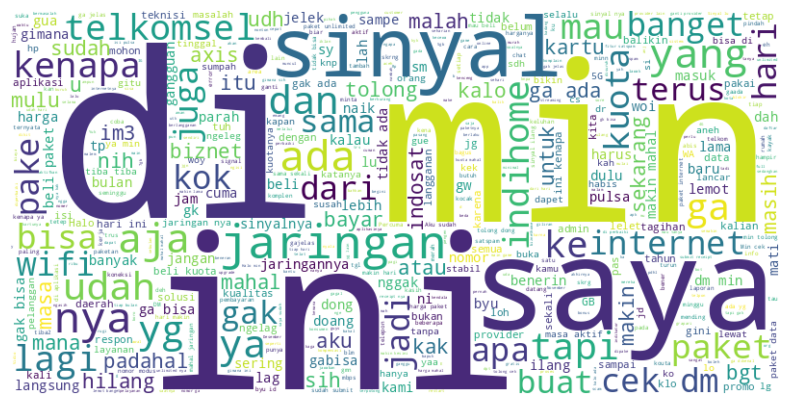

In [3]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

dataset['Text'] = dataset['Text'].fillna('')

text = ' '.join(dataset['Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['Username', 'Time'])

wc = WordCloud(stopwords=stopwords, background_color='white', max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


## Cleaning Data

In [4]:
import pandas as pd
import re
import string

# menghapus emoji
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticon
        u"\U0001F300-\U0001F5FF"  # simbol & pictograph
        u"\U0001F680-\U0001F6FF"  # transport & map
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002700-\U000027BF"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

def clean_text(text):
    if pd.isna(text):
        return ""

    text = re.sub(r"http\S+", "", text)       # hapus link
    text = re.sub(r"@\w+", "", text)          # hapus mention
    text = re.sub(r"#\w+", "", text)          # hapus hashtag
    text = re.sub(r"[^a-zA-Z\s]", "", text)   # hapus simbol
    text = re.sub(r"\s+", " ", text).strip()  # spasi berlebih

    return text

In [5]:
dataset['cleaning_text'] = dataset['Text'].apply(clean_text)

dataset[['Text', 'cleaning_text']]

,Text,cleaning_text
0,"Akhir tahun, promo kembar bikin ambyar!!!Beli ...",Akhir tahun promo kembar bikin ambyarBeli pake...
1,Wow keren aku pake axiz sejak thn 2013,Wow keren aku pake axiz sejak thn
2,Benerin sinyall min gak ada sinyal bet ini kartu,Benerin sinyall min gak ada sinyal bet ini kartu
3,Min paket owsem udah berubah ya ngga kayak dul...,Min paket owsem udah berubah ya ngga kayak dulu
4,"Apa saya aja ya yang aplikasinya muter terus, ...",Apa saya aja ya yang aplikasinya muter terus b...
...,...,...
2114,Min cek dm jaringan saya trouble lg,Min cek dm jaringan saya trouble lg
2115,"Sinyal merah maning, operator gajelas?",Sinyal merah maning operator gajelas
2116,"Ayolah, kita bayar ga ada yg telat lho ini, ma...",Ayolah kita bayar ga ada yg telat lho ini masa...
2117,JARINGAN GA ADA DARI HARI JUMAT KEMAREN DAN TI...,JARINGAN GA ADA DARI HARI JUMAT KEMAREN DAN TI...


## Casefolding (Lowercasing)

In [6]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
      return text

dataset['case_folding'] = dataset['cleaning_text'].apply(case_folding)
dataset[['cleaning_text', 'case_folding']]

,cleaning_text,case_folding
0,Akhir tahun promo kembar bikin ambyarBeli pake...,akhir tahun promo kembar bikin ambyarbeli pake...
1,Wow keren aku pake axiz sejak thn,wow keren aku pake axiz sejak thn
2,Benerin sinyall min gak ada sinyal bet ini kartu,benerin sinyall min gak ada sinyal bet ini kartu
3,Min paket owsem udah berubah ya ngga kayak dulu,min paket owsem udah berubah ya ngga kayak dulu
4,Apa saya aja ya yang aplikasinya muter terus b...,apa saya aja ya yang aplikasinya muter terus b...
...,...,...
2114,Min cek dm jaringan saya trouble lg,min cek dm jaringan saya trouble lg
2115,Sinyal merah maning operator gajelas,sinyal merah maning operator gajelas
2116,Ayolah kita bayar ga ada yg telat lho ini masa...,ayolah kita bayar ga ada yg telat lho ini masa...
2117,JARINGAN GA ADA DARI HARI JUMAT KEMAREN DAN TI...,jaringan ga ada dari hari jumat kemaren dan ti...


## Normalization

In [7]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_word(text, kamus_tidak_baku):
  if isinstance(text, str):
    words = text.split()
    replaced_words = []
    kalimat_baku = []
    kata_diganti = []
    kata_tidak_baku_hash = []

    for word in words:
      if word in kamus_tidak_baku:
        baku = kamus_tidak_baku[word]
        if isinstance(baku, str) and all(char.isalpha() or char.isspace() for char in baku):
          replaced_words.append(baku)
          kalimat_baku.append(baku)
          kata_diganti.append(word)
          kata_tidak_baku_hash.append(hash(word))
        else:
          # If 'baku' is not a suitable string, append the original word
          replaced_words.append(word)
      else:
        # If word is not in kamus_tidak_baku, append the original word
        replaced_words.append(word)

    # This line should be outside the for loop, but inside the 'if isinstance(text, str)' block
    replaced_text = ' '.join(replaced_words)
    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash
  else:
    # If text is not a string, return empty or default values
    replaced_text = '' # Changed from ' ' to '' for consistency with empty results
    kalimat_baku = []
    kata_diganti = []
    kata_tidak_baku_hash = []
    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [8]:
dataset = pd.DataFrame(dataset[['Text', 'cleaning_text', 'case_folding']])
dataset.head()

,Text,cleaning_text,case_folding
0,"Akhir tahun, promo kembar bikin ambyar!!!Beli ...",Akhir tahun promo kembar bikin ambyarBeli pake...,akhir tahun promo kembar bikin ambyarbeli pake...
1,Wow keren aku pake axiz sejak thn 2013,Wow keren aku pake axiz sejak thn,wow keren aku pake axiz sejak thn
2,Benerin sinyall min gak ada sinyal bet ini kartu,Benerin sinyall min gak ada sinyal bet ini kartu,benerin sinyall min gak ada sinyal bet ini kartu
3,Min paket owsem udah berubah ya ngga kayak dul...,Min paket owsem udah berubah ya ngga kayak dulu,min paket owsem udah berubah ya ngga kayak dulu
4,"Apa saya aja ya yang aplikasinya muter terus, ...",Apa saya aja ya yang aplikasinya muter terus b...,apa saya aja ya yang aplikasinya muter terus b...


In [9]:
from google.colab import files
files.upload()

Saving kamuskatabaku.xlsx to kamuskatabaku.xlsx


{'kamuskatabaku.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [11]:
!ls ~/.kaggle

In [12]:
!kaggle datasets download -d fornigulo/kamus-slag

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [13]:
!unzip kamus-slag.zip

unzip:  cannot find or open kamus-slag.zip, kamus-slag.zip.zip or kamus-slag.zip.ZIP.


In [14]:
kamus_data = pd.read_excel('kamuskatabaku.xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))
kamus_data

,tidak_baku,kata_baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa
...,...,...
15180,pavorit,favorit
15181,nya,ya
15182,lu,kamu
15183,bang,abang


In [15]:
# Terapkan fungsi penggantian kata tidak baku
dataset[
    ['hasil_normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']
] = pd.DataFrame(
    dataset['case_folding'].apply(
        lambda x: replace_word(x, kamus_tidak_baku)
    ).tolist(),
    index=dataset.index
)

# Tampilkan hasil
dataset = pd.DataFrame(dataset[['Text', 'cleaning_text', 'case_folding','hasil_normalisasi']])
dataset.head(50)

,Text,cleaning_text,case_folding,hasil_normalisasi
0,"Akhir tahun, promo kembar bikin ambyar!!!Beli ...",Akhir tahun promo kembar bikin ambyarBeli pake...,akhir tahun promo kembar bikin ambyarbeli pake...,akhir tahun promo kembar bikin ambyarbeli pake...
1,Wow keren aku pake axiz sejak thn 2013,Wow keren aku pake axiz sejak thn,wow keren aku pake axiz sejak thn,wow keren aku pakai axiz sejak tahun
2,Benerin sinyall min gak ada sinyal bet ini kartu,Benerin sinyall min gak ada sinyal bet ini kartu,benerin sinyall min gak ada sinyal bet ini kartu,benerin sinyall min tidak ada sinyal banget in...
3,Min paket owsem udah berubah ya ngga kayak dul...,Min paket owsem udah berubah ya ngga kayak dulu,min paket owsem udah berubah ya ngga kayak dulu,min paket owsem sudah berubah ya tidak kayak dulu
4,"Apa saya aja ya yang aplikasinya muter terus, ...",Apa saya aja ya yang aplikasinya muter terus b...,apa saya aja ya yang aplikasinya muter terus b...,apa saya saja ya yang aplikasinya muter terus ...
5,Benerin dulu jaringannya,Benerin dulu jaringannya,benerin dulu jaringannya,benerin dulu jaringannya
6,Jangan suka aneh aneh min sinyal lu benerin,Jangan suka aneh aneh min sinyal lu benerin,jangan suka aneh aneh min sinyal lu benerin,jangan suka aneh aneh min sinyal kamu benerin
7,Minn balikin paket owsem kami yang puluhan gb ...,Minn balikin paket owsem kami yang puluhan gb ...,minn balikin paket owsem kami yang puluhan gb ...,minn balikin paket owsem kami yang puluhan gb itu
8,"Percuma diskon, kalo gak bisa ke pakek juga",Percuma diskon kalo gak bisa ke pakek juga,percuma diskon kalo gak bisa ke pakek juga,percuma diskon kalau tidak bisa ke pakai juga
9,jaringn ktl,jaringn ktl,jaringn ktl,jaringn ktl


## Tokenizing

In [16]:
def tokenize(text):
    tokens = text.split()
    return tokens

dataset['tokenize'] = dataset['hasil_normalisasi'].apply(tokenize)
dataset[['hasil_normalisasi', 'tokenize']]

,hasil_normalisasi,tokenize
0,akhir tahun promo kembar bikin ambyarbeli pake...,"[akhir, tahun, promo, kembar, bikin, ambyarbel..."
1,wow keren aku pakai axiz sejak tahun,"[wow, keren, aku, pakai, axiz, sejak, tahun]"
2,benerin sinyall min tidak ada sinyal banget in...,"[benerin, sinyall, min, tidak, ada, sinyal, ba..."
3,min paket owsem sudah berubah ya tidak kayak dulu,"[min, paket, owsem, sudah, berubah, ya, tidak,..."
4,apa saya saja ya yang aplikasinya muter terus ...,"[apa, saya, saja, ya, yang, aplikasinya, muter..."
...,...,...
2114,min cek dm jaringan saya trouble lagi,"[min, cek, dm, jaringan, saya, trouble, lagi]"
2115,sinyal merah maning operator tidak jelas,"[sinyal, merah, maning, operator, tidak, jelas]"
2116,ayolah kita bayar tidak ada yang telat lho ini...,"[ayolah, kita, bayar, tidak, ada, yang, telat,..."
2117,jaringan tidak ada dari hari jumat kemarin dan...,"[jaringan, tidak, ada, dari, hari, jumat, kema..."


## Stopword Removal

In [17]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

dataset['stopward removal'] = dataset['tokenize'].apply(remove_stopwords)
dataset[['tokenize', 'stopward removal']]
dataset.head(100)

,Text,cleaning_text,case_folding,hasil_normalisasi,tokenize,stopward removal
0,"Akhir tahun, promo kembar bikin ambyar!!!Beli ...",Akhir tahun promo kembar bikin ambyarBeli pake...,akhir tahun promo kembar bikin ambyarbeli pake...,akhir tahun promo kembar bikin ambyarbeli pake...,"[akhir, tahun, promo, kembar, bikin, ambyarbel...","[promo, kembar, bikin, ambyarbeli, paket, data..."
1,Wow keren aku pake axiz sejak thn 2013,Wow keren aku pake axiz sejak thn,wow keren aku pake axiz sejak thn,wow keren aku pakai axiz sejak tahun,"[wow, keren, aku, pakai, axiz, sejak, tahun]","[wow, keren, pakai, axiz]"
2,Benerin sinyall min gak ada sinyal bet ini kartu,Benerin sinyall min gak ada sinyal bet ini kartu,benerin sinyall min gak ada sinyal bet ini kartu,benerin sinyall min tidak ada sinyal banget in...,"[benerin, sinyall, min, tidak, ada, sinyal, ba...","[benerin, sinyall, min, sinyal, banget, kartu]"
3,Min paket owsem udah berubah ya ngga kayak dul...,Min paket owsem udah berubah ya ngga kayak dulu,min paket owsem udah berubah ya ngga kayak dulu,min paket owsem sudah berubah ya tidak kayak dulu,"[min, paket, owsem, sudah, berubah, ya, tidak,...","[min, paket, owsem, berubah, ya, kayak]"
4,"Apa saya aja ya yang aplikasinya muter terus, ...",Apa saya aja ya yang aplikasinya muter terus b...,apa saya aja ya yang aplikasinya muter terus b...,apa saya saja ya yang aplikasinya muter terus ...,"[apa, saya, saja, ya, yang, aplikasinya, muter...","[ya, aplikasinya, muter, coba, perangkat, masu..."
...,...,...,...,...,...,...
100,". Naikin lahh sinyalnya ke 5G,, 4G mulu.. Yg l...",Naikin lahh sinyalnya ke G G mulu Yg lain udah...,naikin lahh sinyalnya ke g g mulu yg lain udah...,naikin lah sinyalnya ke tidak tidak mulu yang ...,"[naikin, lah, sinyalnya, ke, tidak, tidak, mul...","[naikin, sinyalnya, mulu, kartu]"
101,Nambah pala bapak kau jaringan ga ada,Nambah pala bapak kau jaringan ga ada,nambah pala bapak kau jaringan ga ada,menambah kepala bapak kau jaringan tidak ada,"[menambah, kepala, bapak, kau, jaringan, tidak...","[menambah, kepala, kau, jaringan]"
102,sinyal lag gada perubahan dan penjelasan saatn...,sinyal lag gada perubahan dan penjelasan saatn...,sinyal lag gada perubahan dan penjelasan saatn...,sinyal lag tidak ada perubahan dan penjelasan ...,"[sinyal, lag, tidak, ada, perubahan, dan, penj...","[sinyal, lag, perubahan, penjelasan, rating, b..."
103,BENERIN JARINGAN LOL PURA PURA CUEK,BENERIN JARINGAN LOL PURA PURA CUEK,benerin jaringan lol pura pura cuek,benerin jaringan lol pura pura cuek,"[benerin, jaringan, lol, pura, pura, cuek]","[benerin, jaringan, lol, pura, pura, cuek]"


## Stemming (Change word to original of it)

In [20]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:00


In [21]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

dataset['steming_data'] = dataset['stopward removal'].apply(stem_text)
dataset[['stopward removal', 'steming_data']]
dataset.head(100)

,Text,cleaning_text,case_folding,hasil_normalisasi,tokenize,stopward removal,steming_data
0,"Akhir tahun, promo kembar bikin ambyar!!!Beli ...",Akhir tahun promo kembar bikin ambyarBeli pake...,akhir tahun promo kembar bikin ambyarbeli pake...,akhir tahun promo kembar bikin ambyarbeli pake...,"[akhir, tahun, promo, kembar, bikin, ambyarbel...","[promo, kembar, bikin, ambyarbeli, paket, data...","[promo, kembar, bikin, ambyarbeli, paket, data..."
1,Wow keren aku pake axiz sejak thn 2013,Wow keren aku pake axiz sejak thn,wow keren aku pake axiz sejak thn,wow keren aku pakai axiz sejak tahun,"[wow, keren, aku, pakai, axiz, sejak, tahun]","[wow, keren, pakai, axiz]","[wow, keren, pakai, axiz]"
2,Benerin sinyall min gak ada sinyal bet ini kartu,Benerin sinyall min gak ada sinyal bet ini kartu,benerin sinyall min gak ada sinyal bet ini kartu,benerin sinyall min tidak ada sinyal banget in...,"[benerin, sinyall, min, tidak, ada, sinyal, ba...","[benerin, sinyall, min, sinyal, banget, kartu]","[benerin, sinyall, min, sinyal, banget, kartu]"
3,Min paket owsem udah berubah ya ngga kayak dul...,Min paket owsem udah berubah ya ngga kayak dulu,min paket owsem udah berubah ya ngga kayak dulu,min paket owsem sudah berubah ya tidak kayak dulu,"[min, paket, owsem, sudah, berubah, ya, tidak,...","[min, paket, owsem, berubah, ya, kayak]","[min, paket, owsem, ubah, ya, kayak]"
4,"Apa saya aja ya yang aplikasinya muter terus, ...",Apa saya aja ya yang aplikasinya muter terus b...,apa saya aja ya yang aplikasinya muter terus b...,apa saya saja ya yang aplikasinya muter terus ...,"[apa, saya, saja, ya, yang, aplikasinya, muter...","[ya, aplikasinya, muter, coba, perangkat, masu...","[ya, aplikasi, muter, coba, perangkat, masuk, ..."
...,...,...,...,...,...,...,...
100,". Naikin lahh sinyalnya ke 5G,, 4G mulu.. Yg l...",Naikin lahh sinyalnya ke G G mulu Yg lain udah...,naikin lahh sinyalnya ke g g mulu yg lain udah...,naikin lah sinyalnya ke tidak tidak mulu yang ...,"[naikin, lah, sinyalnya, ke, tidak, tidak, mul...","[naikin, sinyalnya, mulu, kartu]","[naikin, sinyal, mulu, kartu]"
101,Nambah pala bapak kau jaringan ga ada,Nambah pala bapak kau jaringan ga ada,nambah pala bapak kau jaringan ga ada,menambah kepala bapak kau jaringan tidak ada,"[menambah, kepala, bapak, kau, jaringan, tidak...","[menambah, kepala, kau, jaringan]","[tambah, kepala, kau, jaring]"
102,sinyal lag gada perubahan dan penjelasan saatn...,sinyal lag gada perubahan dan penjelasan saatn...,sinyal lag gada perubahan dan penjelasan saatn...,sinyal lag tidak ada perubahan dan penjelasan ...,"[sinyal, lag, tidak, ada, perubahan, dan, penj...","[sinyal, lag, perubahan, penjelasan, rating, b...","[sinyal, lag, ubah, jelas, rating, bintang, pl..."
103,BENERIN JARINGAN LOL PURA PURA CUEK,BENERIN JARINGAN LOL PURA PURA CUEK,benerin jaringan lol pura pura cuek,benerin jaringan lol pura pura cuek,"[benerin, jaringan, lol, pura, pura, cuek]","[benerin, jaringan, lol, pura, pura, cuek]","[benerin, jaring, lol, pura, pura, cuek]"


## Hapus data bernilai kosong (NaN)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2022 entries, 0 to 2118
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Text               2022 non-null   object
 1   cleaning_text      2022 non-null   object
 2   case_folding       2022 non-null   object
 3   hasil_normalisasi  2022 non-null   object
 4   tokenize           2022 non-null   object
 5   stopward removal   2022 non-null   object
 6   steming_data       2022 non-null   object
dtypes: object(7)
memory usage: 126.4+ KB


In [23]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2022 entries, 0 to 2118
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Text               2022 non-null   object
 1   cleaning_text      2022 non-null   object
 2   case_folding       2022 non-null   object
 3   hasil_normalisasi  2022 non-null   object
 4   tokenize           2022 non-null   object
 5   stopward removal   2022 non-null   object
 6   steming_data       2022 non-null   object
dtypes: object(7)
memory usage: 126.4+ KB


## Wordcloud setelah preprocessing

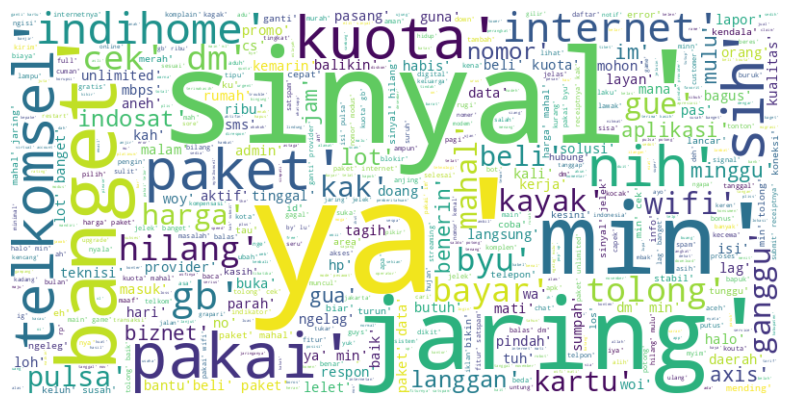

In [28]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#Menggabungkan teks dari kolom 'steming_data'

text = ' '.join(dataset['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update([
    'min', 'admin', 'cek', 'dm', 'ya', 'dong',
    'nih', 'aja', 'sih', 'nya', 'ktl', 'woy'
])

wc = WordCloud(stopwords=stopwords, background_color='white', max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# Simpan DataFrame dalam bentuk file Excel
dataset.to_excel('data_preprocessing.xlsx', index=False)

## Take sample for manual labelling

In [ ]:
import pandas as pd

dataset = pd.read_csv(
    'drive/MyDrive/Laporan PA/PA LJ D4/Dataset/dataset_preprocessed_klausa.csv'
)

sample_label = dataset.sample(300, random_state=42)

sample_label = sample_label[['Klausa', 'provider']]
sample_label['Aspek'] = ''
sample_label['Sentimen'] = ''

dataset.loc[dataset['Klausa'].str.contains('\n', regex=False), 'Klausa'].head()
dataset['Klausa'] = dataset['Klausa'].str.split('\n')
dataset = dataset.explode('Klausa')
dataset['Klausa'] = dataset['Klausa'].str.strip()
dataset = dataset[dataset['Klausa'] != '']
dataset = dataset.reset_index(drop=True)

sample_label.to_csv(
    'drive/MyDrive/Laporan PA/PA LJ D4/Dataset/sample_labeling_klausa.csv',
    index=False
)